<a href="https://colab.research.google.com/github/pranscript/ml_coursework/blob/master/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import files
import io

In [37]:
uploaded1 = files.upload()

Saving train.csv to train (1).csv


In [39]:
uploaded2 = files.upload()

Saving test.csv to test (1).csv


In [0]:
train_df = pd.read_csv(io.StringIO(uploaded1['train.csv'].decode('utf-8')))
test_df = pd.read_csv(io.StringIO(uploaded2['test.csv'].decode('utf-8')))


## Answer - 9

In [41]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


## Answer 10

In [42]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


# Answer 11

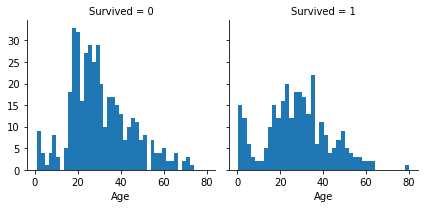

In [43]:
import seaborn as sea
import matplotlib.pyplot as plt
%matplotlib inline

graph = sea.FacetGrid(train_df, col='Survived')
graph.map(plt.hist, 'Age', bins=40)

## Answer 12

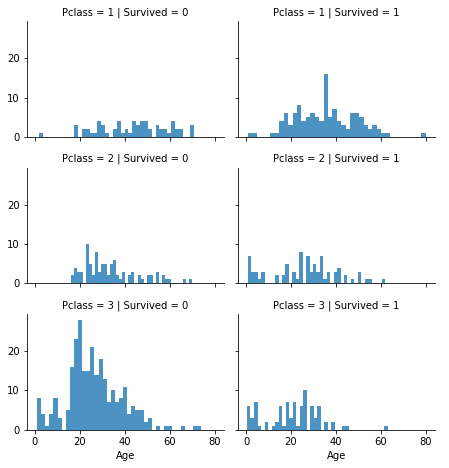

In [45]:
grid = sea.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.4)
grid.map(plt.hist, 'Age', alpha=.8, bins=40)
grid.add_legend();

## Answer 13

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


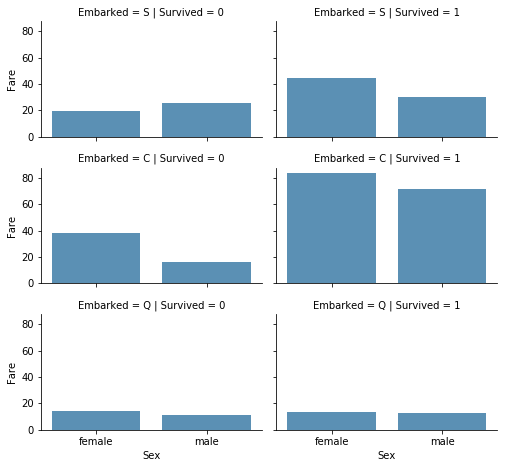

In [46]:
grid = sea.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sea.barplot, 'Sex', 'Fare', alpha=.8, ci=None)
grid.add_legend()

## Answer 14

In [47]:
train_df['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

## Answer 19

In [48]:
test_df['Fare'].isnull().sum() # number of NAN in 'Fare' feature.

1

In [49]:
test_df['Fare'].mode()[0] # The mode in 'Fare' feature.

7.75

In [50]:
for column in test_df['Fare']:
    test_df['Fare'].fillna(test_df['Fare'].mode()[0], inplace=True)
test_df['Fare'].isnull().sum()

0

## Merged Test and Train Data set

In [0]:
out = train_df.append(test_df, sort=False) # train set and test set are combined

## Answer 15

In [52]:
out['Cabin'].isna().sum()

1014

## Answer - 16

In [53]:
mapping_dict = {'female':1,
                'male':0}
out['Sex'] = out['Sex'].map(mapping_dict)
out

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S


## Answer 17

In [54]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
out['Age'] = imputer.fit_transform(out[['Age']])
out

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,29.881138,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",0,29.881138,0,0,359309,8.0500,NaN,S


## Answer 18

In [55]:
out['Embarked'].value_counts().index[0]

'S'

In [56]:
out = out.fillna(out['Embarked'].value_counts().index[0])
out

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,S,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,S,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,S,3,"Spector, Mr. Woolf",0,29.881138,0,0,A.5. 3236,8.0500,S,S
414,1306,S,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,PC 17758,108.9000,C105,C
415,1307,S,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S,S
416,1308,S,3,"Ware, Mr. Frederick",0,29.881138,0,0,359309,8.0500,S,S


## Answer 20 

In [58]:
r = [-0.001, 7.91, 14.454, 31.0, 512.329]
g = [0,1,2,3]
out['Fare'] = pd.cut(out['Fare'], bins=r, labels=g)
out

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,0,S,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,3,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,1,S,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,3,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,1,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,S,3,"Spector, Mr. Woolf",0,29.881138,0,0,A.5. 3236,1,S,S
414,1306,S,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,PC 17758,3,C105,C
415,1307,S,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,SOTON/O.Q. 3101262,0,S,S
416,1308,S,3,"Ware, Mr. Frederick",0,29.881138,0,0,359309,1,S,S
